# Resolução de Sistemas Lineares - Métodos Iterativos

### Os Exemplos de matrizes foram retiradas do livro "Cálculo Numérico"

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
A = np.array([[10., 2., 1.],
              [1., 5., 1.],
              [2., 3., 10.]])

b = np.array([[7.], [-8.], [6.]])


def criterioParada(A, it):
    if it == 0: 
        return 1
    else:
        ap = []
        t = len(A[it])
        for i in range(t):
          ap.append(abs(A[it][i] - A[it-1][i]))
        dist = max(ap)
        dist = dist/max(A[it])
        return dist
      
def jacobiMethod(rtol, A, b):
    X0 = []
    t = len(A)
    apInicial = []
    
    for i in range(t): 
      apInicial.append(0)
    X0.append(apInicial)
    k = 0
    while(criterioParada(X0,k) > rtol):
        y = []
        
        for i in range(t):
            soma = 0
            
            for j in range(t):
                if i != j:
                    soma = soma + A[i][j]*X0[k][j]
            y.append(((b[i] - soma)/A[i][i]))
        X0.append(y)
        k +=1
        
    return X0
  

jacobiMethod(0.05,A,b)



[[0, 0, 0],
 [array([0.7]), array([-1.6]), array([0.6])],
 [array([0.96]), array([-1.86]), array([0.94])],
 [array([0.978]), array([-1.98]), array([0.966])],
 [array([0.9994]), array([-1.9888]), array([0.9984])]]

In [10]:
def verifyConvergence(A):
    v = []
    t = len(A)
    for i in range(t):
        soma = 0
        for j in range(t):
            if i != j:
                soma = soma + A[i][j]
        v.append(soma/A[i][i])
    if(max(v) < 1):
        print("Converge para a solução do sistema dado")
    else:
        print("Não converge para a solução do sistema dado")
        
verifyConvergence(A)

Converge para a solução do sistema dado


In [0]:
A = np.array([[5,1,1],[3,4,1],[3,3,6]])
b = np.array([[5],[6],[0]])

def gaussSeidelMethod(rtol, A, b):
    k = 0
    X0 = []
    t = len(A)
    apInicial = []
    
    for i in range(t): 
      apInicial.append(0)
    X0.append(apInicial)
    
    while(criterioParada(X0,k) > rtol):
        y = []
        
        for i in range(t):
            soma = 0
            
            for j in range(t):
                ty = len(y)
                if i != j:
                  if j<ty:
                    soma = soma + A[i][j]*y[j]               
                  else:
                    soma = soma + A[i][j]*X0[k][j]
            y.append(((b[i] - soma)/A[i][i]))
        X0.append(y)
        k +=1
        
    return X0
  

gaussSeidelMethod(0.05,A,b)


[[0, 0, 0],
 [array([1.]), array([0.75]), array([-0.875])],
 [array([1.025]), array([0.95]), array([-0.9875])],
 [array([1.0075]), array([0.99125]), array([-0.999375])]]

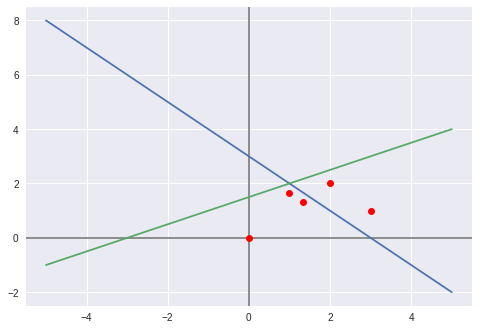

In [0]:
x = np.linspace(-5,5)
y1 = (3 - x)
y2 = (1/2)*(3+x)

plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

v1 = [0,3,2,1,(4/3)]
v2 = [0,1,2,(5/3),(4/3)]

plt.plot(v1, v2, 'ro')
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

No handles with labels found to put in legend.


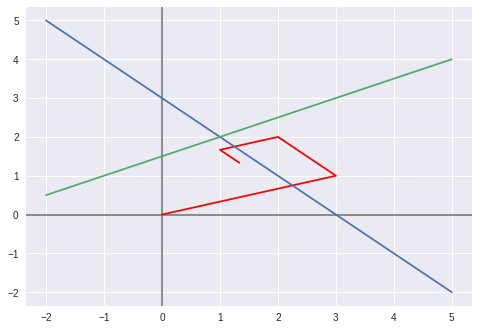

In [0]:
x = np.linspace(-2,5)
y1 = (3 - x)
y2 = (1/2)*(3+x)

plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

v1 = [0,3,2,1,(4/3)]
v2 = [0,1,2,(5/3),(4/3)]

plt.plot(v1, v2, color = "red")
plt.plot(x, y1)
plt.plot(x, y2)

plt.legend()
plt.show()

# Resolução de Sistemas Lineares - Método Iterativo de Jacobi

### Exemplo A

In [7]:
A = np.array([[10., 2., 1.],
              [1., 5., 1.],
              [2., 3., 10.]])
verifyConvergence(A)

Converge para a solução do sistema dado


### Exemplo B

In [8]:
B = np.array([[1., 1.],
              [1., -3.]])
b = np.array([3,-3])

verifyConvergence(B)
jacobiMethod(0.05, B, b)

Converge para a solução do sistema dado


[[0, 0],
 [3.0, 1.0],
 [2.0, 2.0],
 [1.0, 1.6666666666666667],
 [1.3333333333333333, 1.3333333333333333],
 [1.6666666666666667, 1.4444444444444444],
 [1.5555555555555556, 1.5555555555555556],
 [1.4444444444444444, 1.5185185185185184],
 [1.4814814814814816, 1.4814814814814816]]

### Exemplo C

In [11]:
C = np.array([[1., 3., 1.],
              [5., 2., 2.],
              [0., 6., 8.]])

b = np.array([-2, 3, -6])

verifyConvergence(C)
jacobiMethod(0.05, C, b)

Não converge para a solução do sistema dado


[[0, 0, 0],
 [-2.0, 1.5, -0.75],
 [-5.75, 7.25, -1.875],
 [-21.875, 17.75, -6.1875],
 [-49.0625, 62.375, -14.0625],
 [-175.0625, 138.21875, -47.53125],
 [-369.125, 486.6875, -104.4140625],
 [-1357.6484375, 1028.7265625, -365.765625],
 [-2722.4140625, 3761.38671875, -772.294921875],
 [-10513.865234375, 7579.830078125, -2821.7900390625],
 [-19919.7001953125, 29107.953125, -5685.62255859375],
 [-81640.23681640625, 55486.373046875, -21831.71484375],
 [-144629.404296875, 225933.80688476562, -41615.52978515625],
 [-636187.8908691406, 403190.54052734375, -169451.10516357422],
 [-1040122.516418457, 1759922.3323364258, -302393.6553955078],
 [-4977375.3416137695, 2902701.4464416504, -1319942.4992523193],
 [-7388163.840072632, 13763382.353286743, -2177026.834831238],
 [-39113122.22502899, 20647437.935012817, -10322537.514965057],
 [-51619778.290073395, 108105344.57753754, -15485579.201259613],
 [-308830456.531353, 144535026.4264431, -81079009.18315315],
 [-352526072.09617615, 853155152.0115356, -